In [1]:
import torch 
from train import trainAR
from models import *
from matplotlib import pyplot as plt
import build
from tqdm.notebook import tqdm

In [2]:
def gen_signal(freq):
    return torch.sin(freq * torch.arange(0, 1000).float()).view(1, 1000) * 0.9
dataset = [(gen_signal(f), 0) for f in torch.arange(0.1, 1.0, 0.01)]
loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [3]:
c = 100
model = Sequential(
    ConvBlock(1, c, 1, shift=1),
    Res(GatedConvBlock(c, c, 2)),
    Res(GatedConvBlock(c, c, 4)),
    Res(GatedConvBlock(c, c, 8)),
    Res(GatedConvBlock(c, c, 16)),
    Res(GatedConvBlock(c, c, 32)),
    Res(GatedConvBlock(c, c, 64)),
    Res(GatedConvBlock(c, 1, 128)),
    torch.nn.Tanh()
)
print(sum(p.numel() for p in model.parameters()), 'parameters')
print(model)

243402 parameters
Sequential(
  (0): Sequential(
    (0): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Activation(negative_slope=0.2)
    (2): Padded(
      padding=(2, -1)
      (f): Conv1d(1, 100, kernel_size=(2,), stride=(1,), bias=False)
    )
  )
  (1): Sum(
    (f): Identity()
    (g): Product(
      (f): Sequential(
        (0): Sequential(
          (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): Activation(negative_slope=0.2)
          (2): Padded(
            padding=(2, 0)
            (f): Conv1d(100, 100, kernel_size=(2,), stride=(1,), dilation=(2,), bias=False)
          )
        )
        (1): Tanh()
      )
      (g): Sequential(
        (0): Sequential(
          (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): Activation(negative_slope=0.2)
          (2): Padded(
            padding=(2, 0)
            (f): Conv1d(100, 100,

In [29]:
trainAR(
    trial=None,
    device='cpu',
    loader=loader,
    noise=0.1,
    model=model,
    optim=torch.optim.Adam(model.parameters()),
    sched=None,
    criterion=build.criterion(),
    logger=build.logger(console=True, save_rate=None, sample_rate=None), # fix sampling
    epochs=10
)

  0%|          | 0/10 [00:00<?, ?it/s]c:\home\ml\MusicBox\build.py:108: UserWarning: Using a target size (torch.Size([10, 1, 1000])) that is different to the input size (torch.Size([10, 100, 1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = F.mse_loss(input, target)



Epoch: 0.00	mse: 0.01368810422718525 

Epoch: 0.11	mse: 0.03349006921052933 

Epoch: 0.22	mse: 0.01962365210056305 

Epoch: 0.33	mse: 0.01857670769095421 

Epoch: 0.44	mse: 0.018354007974267006 

Epoch: 0.56	mse: 0.016843758523464203 

Epoch: 0.67	mse: 0.014554974623024464 

Epoch: 0.78	mse: 0.015954291447997093 

Epoch: 0.89	mse: 0.014183100312948227 


 10%|█         | 1/10 [00:04<00:37,  4.21s/it]


Epoch: 1.00	mse: 0.01247886661440134 

Epoch: 1.11	mse: 0.01463395357131958 

Epoch: 1.22	mse: 0.017168551683425903 

Epoch: 1.33	mse: 0.012970538809895515 

Epoch: 1.44	mse: 0.011082823388278484 

Epoch: 1.56	mse: 0.0122084254398942 

Epoch: 1.67	mse: 0.01195153035223484 

Epoch: 1.78	mse: 0.012323876842856407 

Epoch: 1.89	mse: 0.0110095776617527 


 20%|██        | 2/10 [00:08<00:33,  4.13s/it]


Epoch: 2.00	mse: 0.010599249042570591 

Epoch: 2.11	mse: 0.010778644122183323 

Epoch: 2.22	mse: 0.009405713528394699 

Epoch: 2.33	mse: 0.01085351500660181 

Epoch: 2.44	mse: 0.008991459384560585 

Epoch: 2.56	mse: 0.010090500116348267 

Epoch: 2.67	mse: 0.008488810621201992 

Epoch: 2.78	mse: 0.009214499965310097 

Epoch: 2.89	mse: 0.008523295633494854 


 30%|███       | 3/10 [00:12<00:28,  4.09s/it]


Epoch: 3.00	mse: 0.007878524251282215 

Epoch: 3.11	mse: 0.011162330396473408 

Epoch: 3.22	mse: 0.008126494474709034 

Epoch: 3.33	mse: 0.007721379864960909 

Epoch: 3.44	mse: 0.008232162334024906 

Epoch: 3.56	mse: 0.008011290803551674 

Epoch: 3.67	mse: 0.008510816842317581 

Epoch: 3.78	mse: 0.007743552792817354 

Epoch: 3.89	mse: 0.0073786028660833836 


 40%|████      | 4/10 [00:16<00:24,  4.07s/it]


Epoch: 4.00	mse: 0.009157036431133747 

Epoch: 4.11	mse: 0.00656910752877593 

Epoch: 4.22	mse: 0.007298092823475599 

Epoch: 4.33	mse: 0.0064490968361496925 

Epoch: 4.44	mse: 0.0074163684621453285 

Epoch: 4.56	mse: 0.0065384372137486935 

Epoch: 4.67	mse: 0.006625095847994089 

Epoch: 4.78	mse: 0.008249756880104542 

Epoch: 4.89	mse: 0.006697081029415131 


 50%|█████     | 5/10 [00:20<00:20,  4.06s/it]


Epoch: 5.00	mse: 0.007941932417452335 

Epoch: 5.11	mse: 0.006983945146203041 

Epoch: 5.22	mse: 0.0065788570791482925 

Epoch: 5.33	mse: 0.006345022935420275 

Epoch: 5.44	mse: 0.005895014852285385 

Epoch: 5.56	mse: 0.00646353792399168 

Epoch: 5.67	mse: 0.006248584017157555 

Epoch: 5.78	mse: 0.0060939062386751175 

Epoch: 5.89	mse: 0.006035450845956802 


 60%|██████    | 6/10 [00:24<00:16,  4.06s/it]


Epoch: 6.00	mse: 0.005651656538248062 

Epoch: 6.11	mse: 0.005207499023526907 

Epoch: 6.22	mse: 0.0058894529938697815 

Epoch: 6.33	mse: 0.006217005662620068 

Epoch: 6.44	mse: 0.005710134748369455 

Epoch: 6.56	mse: 0.005697986111044884 

Epoch: 6.67	mse: 0.0050443923100829124 

Epoch: 6.78	mse: 0.005287894979119301 

Epoch: 6.89	mse: 0.005203080363571644 


 70%|███████   | 7/10 [00:28<00:12,  4.05s/it]


Epoch: 7.00	mse: 0.006189942359924316 

Epoch: 7.11	mse: 0.005141574889421463 

Epoch: 7.22	mse: 0.008101477287709713 

Epoch: 7.33	mse: 0.0052247075363993645 

Epoch: 7.44	mse: 0.005910626146942377 

Epoch: 7.56	mse: 0.005784598179161549 

Epoch: 7.67	mse: 0.006337564438581467 

Epoch: 7.78	mse: 0.005683169234544039 

Epoch: 7.89	mse: 0.0055524446070194244 


 80%|████████  | 8/10 [00:32<00:08,  4.04s/it]


Epoch: 8.00	mse: 0.005591532681137323 

Epoch: 8.11	mse: 0.005611003842204809 

Epoch: 8.22	mse: 0.006376034114509821 

Epoch: 8.33	mse: 0.005052116699516773 

Epoch: 8.44	mse: 0.005980370566248894 

Epoch: 8.56	mse: 0.0063464040867984295 

Epoch: 8.67	mse: 0.007948425598442554 

Epoch: 8.78	mse: 0.005750313866883516 

Epoch: 8.89	mse: 0.006518987473100424 


 90%|█████████ | 9/10 [00:36<00:04,  4.04s/it]


Epoch: 9.00	mse: 0.006115155294537544 

Epoch: 9.11	mse: 0.007402701303362846 

Epoch: 9.22	mse: 0.005911238491535187 

Epoch: 9.33	mse: 0.006702660117298365 

Epoch: 9.44	mse: 0.005518524441868067 

Epoch: 9.56	mse: 0.005676510278135538 

Epoch: 9.67	mse: 0.006204023491591215 

Epoch: 9.78	mse: 0.006208445411175489 

Epoch: 9.89	mse: 0.007377247326076031 


100%|██████████| 10/10 [00:40<00:00,  4.06s/it]


0.006346278461731142

In [38]:
def gen(x, model):
    x = torch.cat((x[-1000:], torch.zeros(1, 1)), dim=1)
    y = model(x.unsqueeze(0)).squeeze(0)
    x[0, -1] = y[0, -1]
    return x.clone()

x = (gen_signal(0.1) + gen_signal(0.2)) / (2**0.5)
model.eval()
for i in tqdm(range(500)):
    x = gen(x, model)

  0%|          | 0/500 [00:00<?, ?it/s]

In [39]:
t = x.clone()

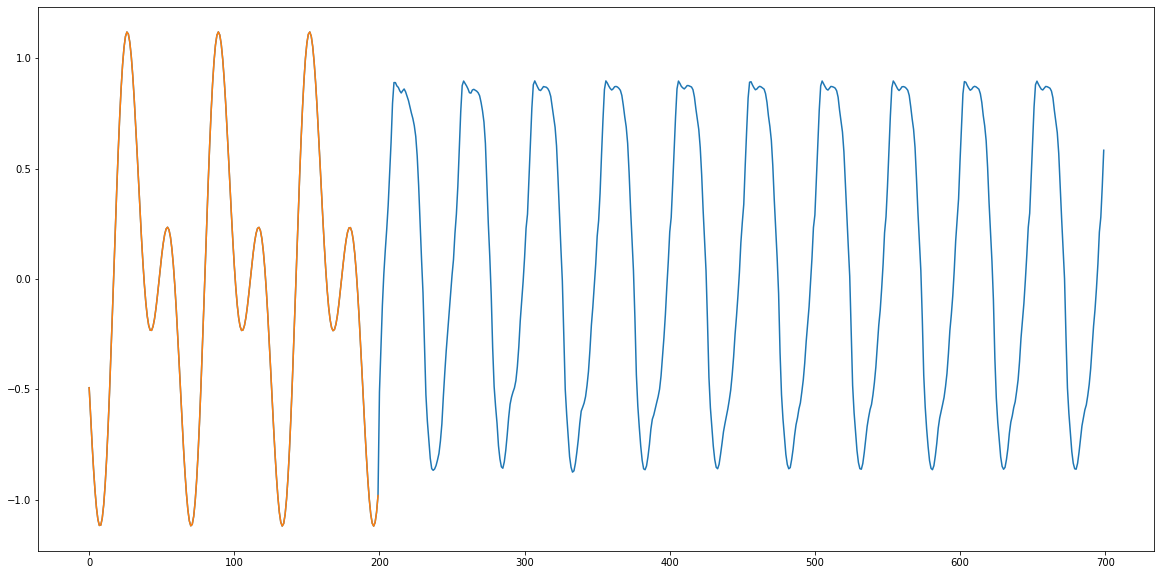

In [40]:
plt.figure(figsize=(20, 10))
t = x[0, 800:]
plt.plot(t.detach())
plt.plot(t[:-500].detach())
plt.show()

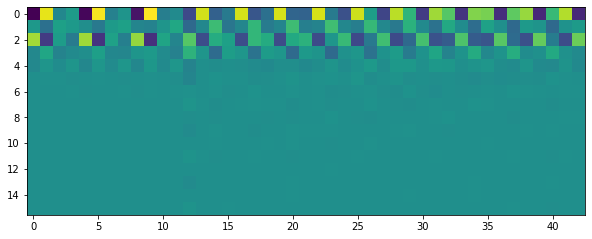

In [41]:
from dct import sdct
s = 16
w = sdct(t.detach().numpy(), frame_length=s, frame_step=s)
plt.figure(figsize=(10, 10))
plt.imshow(w)
plt.show()